In [1]:
import numpy as np

X = np.load("../../../data/multiclass/raw/4-way_multiclass/X_raw.npy")
y = np.load("../../../data/multiclass/raw/4-way_multiclass//y_raw.npy")

In [2]:
pca_features = [(4 , "mnist_multi4_pca_4") ,
                ( 8 , "mnist_multi4_pca_8")]


Validation for mnist_multi4_pca_4

Shapes:
  X_train: (400, 4)
  X_test:  (100, 4)
  y_train: (400,)
  y_test:  (100,)

Data properties:
  dtype: float64
  min:   -8.2964
  max:   5.8542
  mean:  -0.0201
  std:   2.2806

PCA:
  Components: 4
  Variance explained: 39.65%
  Per component: [0.18302325 0.08298625 0.07432105 0.05613297]

Label distribution:
  Train: [ 94 111  96  99]
  Test:  [25 25 25 25]

Visualizing PCA reconstruction...


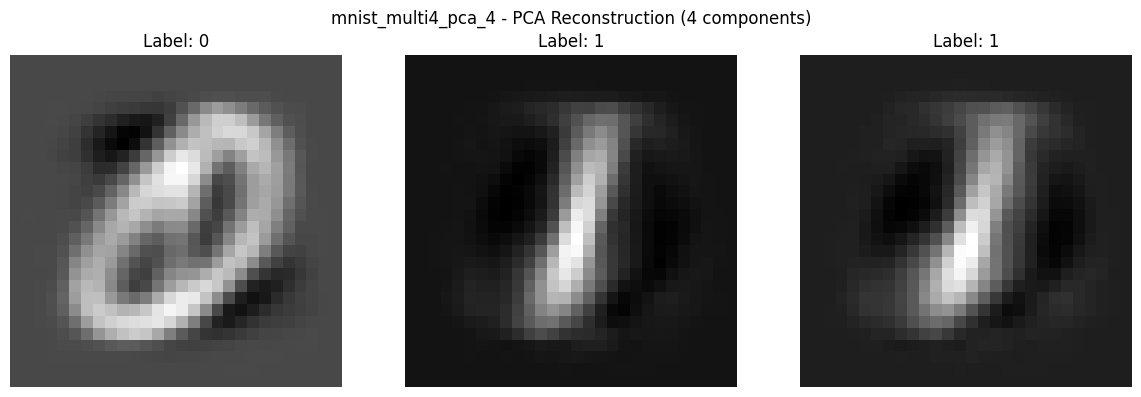

✓ Saved visualization to: ../../../data/multiclass/processed/mnist_multi4_pca_4/pca_reconstruction.png


Validation for mnist_multi4_pca_8

Shapes:
  X_train: (400, 8)
  X_test:  (100, 8)
  y_train: (400,)
  y_test:  (100,)

Data properties:
  dtype: float64
  min:   -8.2964
  max:   5.8542
  mean:  -0.0041
  std:   1.8847

PCA:
  Components: 8
  Variance explained: 54.20%
  Per component: [0.18302325 0.08298625 0.07432105 0.05613297 0.04553568 0.03688178
 0.03224888 0.03089972]

Label distribution:
  Train: [ 94 111  96  99]
  Test:  [25 25 25 25]

Visualizing PCA reconstruction...


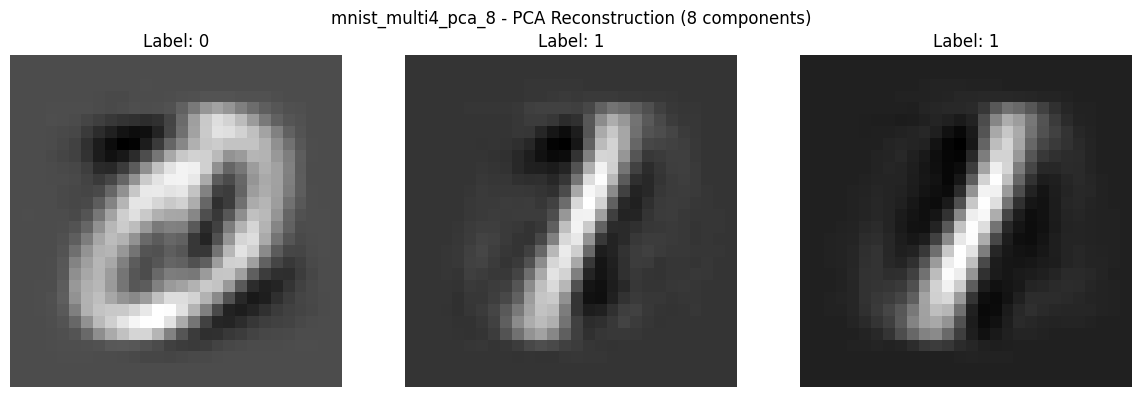

✓ Saved visualization to: ../../../data/multiclass/processed/mnist_multi4_pca_8/pca_reconstruction.png



In [3]:
from sklearn.decomposition import PCA
from pathlib import Path
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

for n, name in pca_features:

    #create folder
    folder = Path("../../../data/multiclass/processed") / name
    folder.mkdir(parents=True, exist_ok=True)

    X_norm = X / 255.0  # Normalize pixels

    #PCA reduction
    pca = PCA(n_components = n)
    X_reduced = pca.fit_transform(X_norm)

    #test/ train split
    X_train, X_test, y_train, y_test = train_test_split(
        X_reduced, y, test_size=0.2, random_state=42
    )

    np.save(folder / 'X_train.npy', X_train)
    np.save(folder / 'X_test.npy', X_test)
    np.save(folder / 'y_train.npy', y_train)
    np.save(folder / 'y_test.npy', y_test)

        # ============= VALIDATION =============
    print(f"\n{'='*60}")
    print(f"Validation for {name}")
    print(f"{'='*60}")
    
    # 1. Shapes
    print(f"\nShapes:")
    print(f"  X_train: {X_train.shape}")
    print(f"  X_test:  {X_test.shape}")
    print(f"  y_train: {y_train.shape}")
    print(f"  y_test:  {y_test.shape}")
    
    # 2. Data properties
    print(f"\nData properties:")
    print(f"  dtype: {X_train.dtype}")
    print(f"  min:   {X_train.min():.4f}")
    print(f"  max:   {X_train.max():.4f}")
    print(f"  mean:  {X_train.mean():.4f}")
    print(f"  std:   {X_train.std():.4f}")
    
    # 3. PCA info
    print(f"\nPCA:")
    print(f"  Components: {n}")
    print(f"  Variance explained: {pca.explained_variance_ratio_.sum():.2%}")
    print(f"  Per component: {pca.explained_variance_ratio_}")
    
    # 4. Label distribution
    print(f"\nLabel distribution:")
    print(f"  Train: {np.bincount(y_train)}")
    print(f"  Test:  {np.bincount(y_test)}")
    
    # 5. Visualize reconstruction
    print(f"\nVisualizing PCA reconstruction...")
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    
    for i in range(3):
        # Reconstruct from PCA
        sample_reconstructed = pca.inverse_transform(X_train[i].reshape(1, -1))
        
        axes[i].imshow(sample_reconstructed.reshape(28, 28), cmap='gray')
        axes[i].set_title(f"Label: {y_train[i]}")
        axes[i].axis('off')
    
    plt.suptitle(f'{name} - PCA Reconstruction ({n} components)')
    plt.tight_layout()
    plt.savefig(folder / 'pca_reconstruction.png', dpi=150)
    plt.show()
    
    print(f"✓ Saved visualization to: {folder}/pca_reconstruction.png")
    print(f"{'='*60}\n")